### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [26]:
import pandas as pd

file_path = '/Users/pranavsharma/Downloads/CMAPSSData/train_FD001.txt'
column_names = [
    'engine_id', 'cycle',
    'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
    'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
    'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
    'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'
]

df = pd.read_csv(file_path, sep=r'\s+', header=None, names=column_names)
print("Shape of the DataFrame:", df.shape)
print("\nDataFrame Info:")
print(df.info())
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Shape of the DataFrame: (20631, 26)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              20631 non-null  int64  
 1   cycle                  20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  s

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

Missing values per column:

engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
sensor_6                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_10                0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_14                0
sensor_15                0
sensor_16                0
sensor_17                0
sensor_18                0
sensor_19                0
sensor_20                0
sensor_21                0
dtype: int64


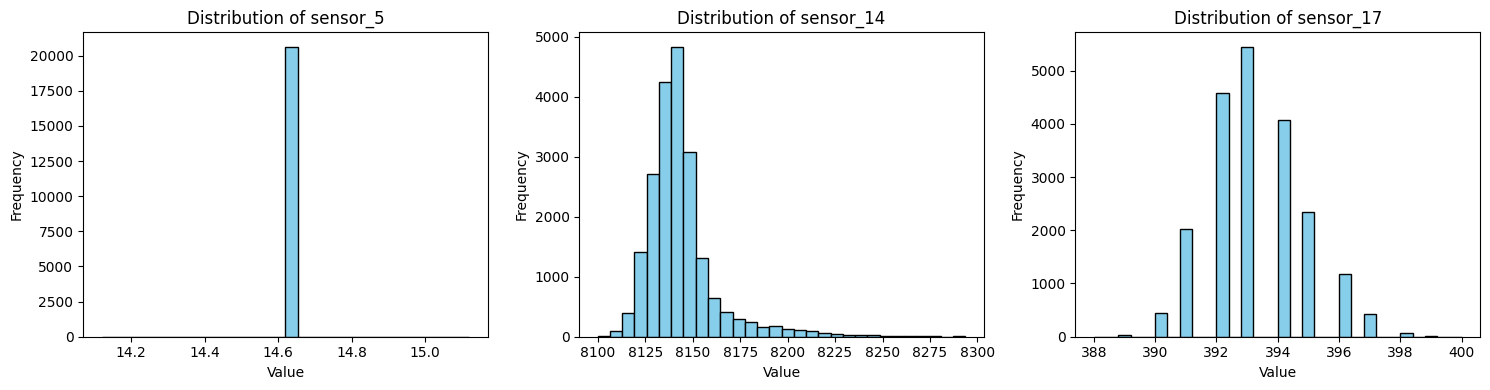

In [27]:
missing_values = df.isnull().sum()
print("Missing values per column:\n")
print(missing_values)

import matplotlib.pyplot as plt
sensors_to_plot = ['sensor_5', 'sensor_14', 'sensor_17']

plt.figure(figsize=(15, 4))
for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[sensor], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {sensor}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [29]:
df['sensor_2_mean'] = df.groupby('engine_id')['sensor_2'].transform('mean')
df['sensor_2_std'] = df.groupby('engine_id')['sensor_2'].transform('std')

df['sensor_2_roll_mean'] = df.groupby('engine_id')['sensor_2']\
                             .transform(lambda x: x.rolling(5, min_periods=1).mean())

print(df[['engine_id', 'cycle', 'sensor_2',
          'sensor_2_mean', 'sensor_2_std', 'sensor_2_roll_mean']].head(10))


   engine_id  cycle  sensor_2  sensor_2_mean  sensor_2_std  sensor_2_roll_mean
0          1      1    641.82     642.621042      0.486795          641.820000
1          1      2    642.15     642.621042      0.486795          641.985000
2          1      3    642.35     642.621042      0.486795          642.106667
3          1      4    642.35     642.621042      0.486795          642.167500
4          1      5    642.37     642.621042      0.486795          642.208000
5          1      6    642.10     642.621042      0.486795          642.264000
6          1      7    642.48     642.621042      0.486795          642.330000
7          1      8    642.56     642.621042      0.486795          642.372000
8          1      9    642.12     642.621042      0.486795          642.326000
9          1     10    641.71     642.621042      0.486795          642.194000


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [col for col in df.columns if ('sensor_'in col) or ('roll' in col)]

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df_scaled[features_to_scale].describe().T[['mean', 'std']]

,mean,std
sensor_1,0.000000e+00,0.000000
sensor_2,6.410348e-14,1.000024
sensor_3,-1.249503e-14,1.000024
sensor_4,9.147407e-16,1.000024
sensor_5,-5.329071e-15,0.000000
sensor_6,-1.353687e-12,1.000024
sensor_7,-3.159162e-14,1.000024
sensor_8,1.008276e-12,1.000024
sensor_9,-4.185214e-14,1.000024
sensor_10,0.000000e+00,0.000000


#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.